In [ ]:
# ==========================================
# Student Performance Predictor
# McCulloch-Pitts Neural Network
# 1000 Row Dataset
# ==========================================

import pandas as pd
import numpy as np

np.random.seed(42)

# ------------------------------------------
# STEP 1: Generate 1000-row Dataset
# ------------------------------------------

rows = 1000

StudyHours = np.random.randint(0, 2, rows)
Attendance = np.random.randint(0, 2, rows)
Assignment = np.random.randint(0, 2, rows)
Participation = np.random.randint(0, 2, rows)
Resources = np.random.randint(0, 2, rows)

# MP neuron logic for true performance
weights = np.array([1,1,1,1,1])
threshold = 3

X_temp = np.column_stack([
    StudyHours,
    Attendance,
    Assignment,
    Participation,
    Resources
])

Performance = (np.dot(X_temp, weights) >= threshold).astype(int)

# Add small noise for realism (optional)
noise_idx = np.random.choice(rows, int(rows*0.05))
Performance[noise_idx] = 1 - Performance[noise_idx]

df = pd.DataFrame({
    "StudyHours": StudyHours,
    "Attendance": Attendance,
    "Assignment": Assignment,
    "Participation": Participation,
    "Resources": Resources,
    "Performance": Performance
})

df.to_csv("student_performance_1000.csv", index=False)

print("Dataset saved: student_performance_1000.csv")
print(df.head())

Dataset saved: student_performance_1000.csv
   StudyHours  Attendance  Assignment  Participation  Resources  Performance
0           0           1           0              1          1            1
1           1           0           1              1          0            1
2           0           0           1              1          0            0
3           0           0           1              1          0            0
4           0           0           1              0          1            0


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.DataFrame({
    "StudyHours": StudyHours,
    "Attendance": Attendance,
    "Assignment": Assignment,
    "Participation": Participation,
    "Resources": Resources,
    "Performance": Performance
})

df.to_csv("student_performance_1000.csv", index=False)

print("Dataset created successfully!")
df.head()


Dataset created successfully!


,StudyHours,Attendance,Assignment,Participation,Resources,Performance
0,0,1,0,1,1,1
1,1,0,1,1,0,1
2,0,0,1,1,0,0
3,0,0,1,1,0,0
4,0,0,1,0,1,0


In [ ]:
def mp_neuron(inputs, weights, threshold):
    s = np.dot(inputs, weights)
    return 1 if s >= threshold else 0


In [ ]:
X = df.drop("Performance", axis=1).values
y = df["Performance"].values

predictions = [mp_neuron(row, weights, threshold) for row in X]

df["Predicted"] = predictions
df.head()


,StudyHours,Attendance,Assignment,Participation,Resources,Performance,Predicted
0,0,1,0,1,1,1,1
1,1,0,1,1,0,1,1
2,0,0,1,1,0,0,0
3,0,0,1,1,0,0,0
4,0,0,1,0,1,0,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split


In [ ]:
np.random.seed(42)
rows = 1000

StudyHours = np.random.randint(0,2,rows)
Attendance = np.random.randint(0,2,rows)
Assignment = np.random.randint(0,2,rows)
Participation = np.random.randint(0,2,rows)
Resources = np.random.randint(0,2,rows)

weights = np.array([1,1,1,1,1])

X_temp = np.column_stack([
    StudyHours, Attendance,
    Assignment, Participation, Resources
])

# True performance rule
threshold_true = 3
Performance = (np.dot(X_temp, weights) >= threshold_true).astype(int)

# add 5% noise
noise = np.random.choice(rows, int(rows*0.05))
Performance[noise] = 1 - Performance[noise]


In [ ]:
df = pd.DataFrame({
    "StudyHours": StudyHours,
    "Attendance": Attendance,
    "Assignment": Assignment,
    "Participation": Participation,
    "Resources": Resources,
    "Performance": Performance
})

df.to_csv("student_performance_1000.csv", index=False)
df.head()


,StudyHours,Attendance,Assignment,Participation,Resources,Performance
0,0,1,0,1,1,1
1,1,0,1,1,0,1
2,0,0,1,1,0,0
3,0,0,1,1,0,0
4,0,0,1,0,1,0


In [ ]:
X = df.drop("Performance", axis=1).values
y = df["Performance"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
def mp_neuron(inputs, weights, threshold):
    s = np.dot(inputs, weights)
    return 1 if s >= threshold else 0


In [ ]:
best_threshold = 0
best_acc = 0

for t in range(1,6):
    preds = [mp_neuron(row, weights, t) for row in X_train]
    acc = accuracy_score(y_train, preds)

    if acc > best_acc:
        best_acc = acc
        best_threshold = t

print("Best Threshold:", best_threshold)


Best Threshold: 3


In [ ]:
test_preds = [mp_neuron(row, weights, best_threshold) for row in X_test]


In [ ]:
acc = accuracy_score(y_test, test_preds)
prec = precision_score(y_test, test_preds)
rec = recall_score(y_test, test_preds)
f1 = f1_score(y_test, test_preds)
cm = confusion_matrix(y_test, test_preds)

print("Accuracy :", round(acc*100,2), "%")
print("Precision:", round(prec,3))
print("Recall   :", round(rec,3))
print("F1 Score :", round(f1,3))
print("\nConfusion Matrix:\n", cm)


Accuracy : 97.0 %
Precision: 0.952
Recall   : 0.99
F1 Score : 0.971

Confusion Matrix:
 [[95  5]
 [ 1 99]]


In [ ]:
def predict_student(study, attend, assign, part, resource):
    data = [study, attend, assign, part, resource]
    result = mp_neuron(data, weights, best_threshold)

    if result == 1:
        return "PASS"
    else:
        return "FAIL"


In [ ]:
# Calculate test accuracy first
test_preds = [mp_neuron(row, weights, best_threshold) for row in X_test]
accuracy = accuracy_score(y_test, test_preds) * 100

while True:
    print("\nEnter Student Details (0 or 1)")

    study = int(input("Regular Study? (1=Yes, 0=No): "))
    attend = int(input("Good Attendance? (1/0): "))
    assign = int(input("Assignments Completed? (1/0): "))
    part = int(input("Class Participation? (1/0): "))
    resource = int(input("Resources Available? (1/0): "))

    student = [study, attend, assign, part, resource]

    result = mp_neuron(student, weights, best_threshold)

    if result == 1:
        print("\nPrediction: Student will PASS ✅")
    else:
        print("\nPrediction: Student may FAIL ❌")

    print("\nModel Accuracy:", round(accuracy,2), "%")

    cont = input("\nPredict another student? (y/n): ")
    if cont.lower() != 'y':
        break



Enter Student Details (0 or 1)
Regular Study? (1=Yes, 0=No): 0
Good Attendance? (1/0): 0
Assignments Completed? (1/0): 0
Class Participation? (1/0): 1
Resources Available? (1/0): 1

Prediction: Student may FAIL ❌

Model Accuracy: 97.0 %

Predict another student? (y/n): n


In [ ]:
print("Enter Student Details (0 or 1)")

study = int(input("Regular Study? (1=Yes, 0=No): "))
attend = int(input("Good Attendance? (1/0): "))
assign = int(input("Assignments Completed? (1/0): "))
part = int(input("Class Participation? (1/0): "))
resource = int(input("Resources Available? (1/0): "))

student = [study, attend, assign, part, resource]
student_score = sum(student)


Enter Student Details (0 or 1)


In [ ]:
result = mp_neuron(student, weights, best_threshold)

if result == 1:
    print("\nPrediction: PASS ✅")
else:
    print("\nPrediction: FAIL ❌")

test_preds = [mp_neuron(row, weights, best_threshold) for row in X_test]
accuracy = accuracy_score(y_test, test_preds) * 100

print("Model Accuracy:", round(accuracy,2), "%")



Prediction: PASS ✅
Model Accuracy: 97.0 %


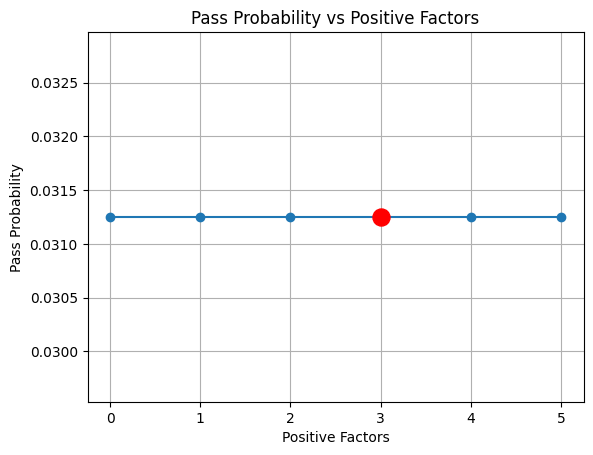

In [ ]:
import matplotlib.pyplot as plt

df["PositiveScore"] = df.drop("Performance", axis=1).sum(axis=1)
prob_data = df.groupby("PositiveScore")["Performance"].mean()

# Ensure all possible positive scores (0-5) are in the index
# Reindex to cover all scores from 0 to 5 and interpolate any missing values.
# This makes the curve continuous and allows plotting any student_score within this range.
all_possible_scores = pd.Series(index=range(6), dtype=float)
prob_data = prob_data.reindex(all_possible_scores.index)
prob_data = prob_data.interpolate(method='linear')

plt.figure()
plt.plot(prob_data.index, prob_data.values, marker='o')

# Safely plot the student's score if it's within the valid range (0-5)
# With the reindexing above, student_score should always be in prob_data.index
if student_score >= 0 and student_score <= 5 and student_score in prob_data.index:
    plt.scatter(student_score,
                prob_data.loc[student_score],
                s=150, color='red', zorder=5) # Added color and zorder for better visibility
else:
    print(f"Warning: Student score {student_score} is outside the expected range (0-5) or could not be found in the probability data.")

plt.title("Pass Probability vs Positive Factors")
plt.xlabel("Positive Factors")
plt.ylabel("Pass Probability")
plt.grid()
plt.show()

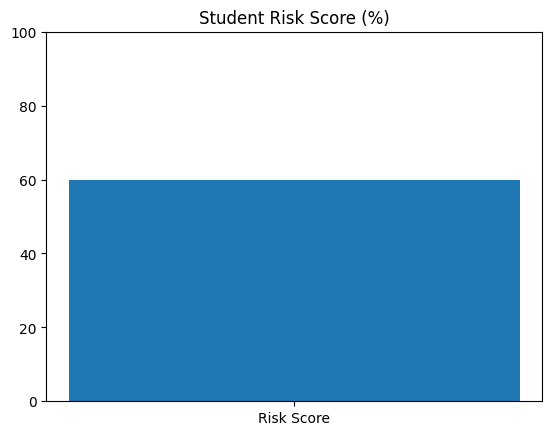

In [ ]:
risk = (5 - student_score) / 5 * 100

plt.figure()
plt.bar(["Risk Score"], [risk])
plt.ylim(0,100)
plt.title("Student Risk Score (%)")
plt.show()


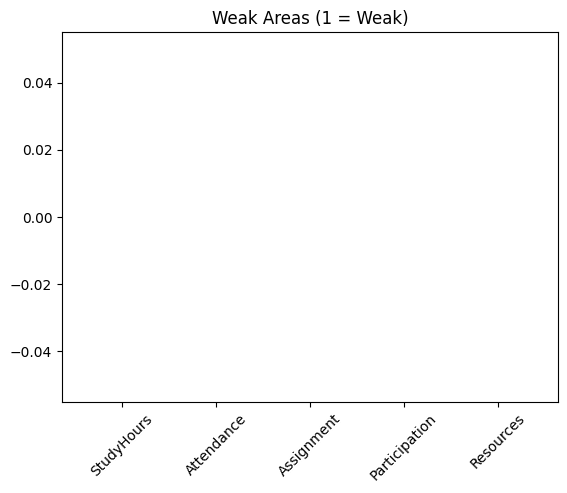

1

In [ ]:
features = ["StudyHours","Attendance",
            "Assignment","Participation","Resources"]

weak = [1 if v == 0 else 0 for v in student]

plt.figure()
plt.bar(features, weak)
plt.title("Weak Areas (1 = Weak)")
plt.xticks(rotation=45)
plt.show()
1